# Práctica 5: Pruebas estadísticas
## Gabriela Sánchez Y. 

En su quinto reporte, apliquen por lo menos tres diferentes tipos de pruebas estadísticas de hipótesis, argumentando por qué las pruebas con aplicables en cada caso. Pueden ser las mismas de los ejemplos o algunas otras (hay docenas si no cientos disponibles).


El objetivo de la práctica es aplicar diferentes tipos de pruebas estadísticas de hipótesis a las variables de estudio que se piensa que causan diferencia en los resultados. Primero se revisa cómo es la distribución de los datos ya que varias pruebas estadísticas dependen de la distribución de los mismos.

Se cargan los datos.

In [66]:
import pandas as pd
datos = pd.read_csv("vf_datos.csv")
datos.head()

,mes,mpio,fecha,hora,victima,sexo_v,edad_v,parentesco,edo_civil_v,ocupacion_v,escolaridad_v,agresor,sexo_a,edad_a,edo_civil_a,ocupacion_a,escolaridad_a,pob
0,1,9,2018/01/01,23,1,F,46,UNION LIBRE,UNIÓN LIBRE,EMPLEADO,SECUNDARIA,1.0,M,36 a 40,UNIÓN LIBRE,PRESTADOR DE SERVICIOS,SECUNDARIA,95534
1,1,9,2017/12/27,8,1,F,26,CONCUBINO (A),UNIÓN LIBRE,HOGAR,SECUNDARIA,1.0,M,21 a 25,UNIÓN LIBRE,SIN OFICIO,SECUNDARIA,95534
2,1,9,2018/01/01,11,1,F,42,NINGUNO,UNIÓN LIBRE,EMPLEADO,PREPARATORIA,1.0,M,41,CASADO,CHOFER,SECUNDARIA,95534
3,1,12,2017/12/22,11,1,F,26,CONCUBINO (A),UNIÓN LIBRE,HOGAR,PREPARATORIA,1.0,M,34,UNIÓN LIBRE,EMPLEADO,PRIMARIA,42715
4,1,12,2017/12/25,19,1,F,38,ESPOSO (A),CASADO,HOGAR,SECUNDARIA,1.0,M,45,CASADO,EMPLEADO,PREPARATORIA,42715


### Hora

Se analiza si la hora influye en en número de incidentes. Hay que determinar si los datos siguen una distribución normal. Primero se grafica la información en un histograma para terner una idea remota de si la infromación sigue o no una distribución normal y después se aplica una prueba de normalidad de Shapiro-Wilk.

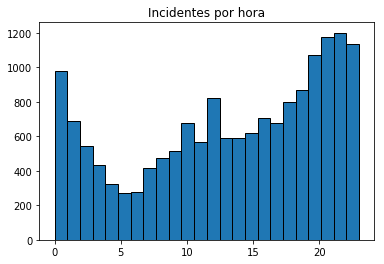

In [67]:
import matplotlib.pyplot as plt
from scipy.stats import shapiro

hora = datos.hora
plt.title('Incidentes por hora')
plt.hist(hora, edgecolor = 'black',  linewidth=1, bins = 24)
plt.savefig('horas.eps')

Si se inicia la curva a partir de las 5:00 horas la curva parecería tener una distribución normal aunque con dos picos en las 11:00 y 13:00 horas. 

Se realiza un gráfico de cuantil-cualtil y se realiza la prueba de normalidad.

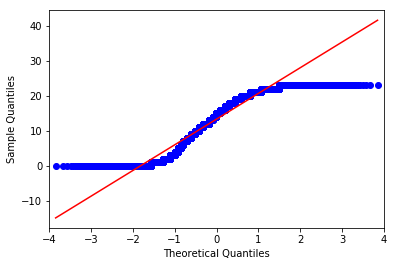

In [68]:
from statsmodels.graphics.gofplots import qqplot
qqplot_data = qqplot(hora, line='s').gca().lines

In [69]:
from scipy.stats import shapiro
import plotly.figure_factory as ff
import plotly.plotly as py
stat, p = shapiro(hora)

# interpret
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = 'Sample does not look Gaussian (reject H0)'

result_mat = [
    ['Length of the sample data', 'Test Statistic', 'p-value', 'Comments'],
    [len(hora), stat, p, msg]
]

swt_table = ff.create_table(result_mat)
swt_table['data'][0].colorscale=[[0, '#2a3f5f'],[1, '#ffffff']]
swt_table['layout']['height']=200
swt_table['layout']['margin']['t']=50
swt_table['layout']['margin']['b']=50

py.iplot(swt_table, filename='shapiro-wilk-table')

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.

/usr/local/lib/python3.5/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



El gráfico cuantil-cuantil permite observar que los datos no parecen seguir una distribución normal, resultado que se verifica con lo obtenido con la prueba de normalidad.

### Meses

Ahora se revisa la normalidad de los datos correspondientes a los meses. Primero se grafica un histograma para tener una idea de lo que sucede con los datos.

/usr/local/lib/python3.5/dist-packages/scipy/stats/morestats.py:1653: UserWarning:

p-value may not be accurate for N > 5000.



Statistics=0.959, p=0.000
NO normal


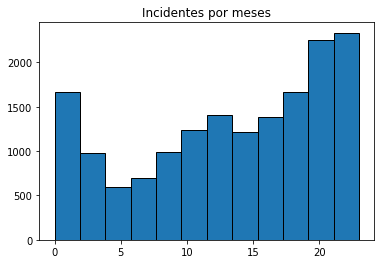

In [70]:
mes = datos.mes.value_counts()
plt.title('Incidentes por meses')
plt.hist(hora, edgecolor = 'black',  linewidth=1, bins = 12)
plt.savefig('mes.eps')

meses = datos.mes
stat, p = shapiro(meses)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('NO normal')

La prueba indica que los datos no siguen una distribución normal, esto puede observarse en el gráfico cuantil-cuantil.

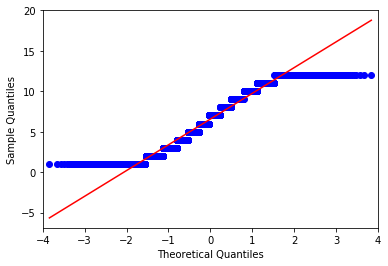

In [71]:
qqplot_data = qqplot(meses, line='s').gca().lines

Finalmente, se revisa la normalidad de los datos correspondientes a las edades de las víctimas y agresores. 

Para esto primero se grafica el histograma correspondiente, después el gráfico cuantil-cuantil y por último se realiza la prueba de normalidad. 

Los datos no se encuentran en el formato adecuado por lo que primero se procede a realizar la limpieza correspondiente.

In [72]:
edadv = datos.edad_v # edades de las victimas
edad_v = []
for dato in edadv:
    s = str(dato).replace(",", " ")
    pedazos = s.split()   
    while "a" in pedazos:
        pos = pedazos.index("a")
        desde = int(pedazos[pos - 1])
        hasta = int(pedazos[pos + 1])
        prom = (desde + hasta) // 2
        edad_v.append(prom)
        pedazos = pedazos[:(pos - 1)] + pedazos[(pos + 2):]
    edad_v += pedazos
edad_v = list(filter(lambda dato: dato != "NE", edad_v)) 
edad_v = list(filter(lambda dato: dato != "nan", edad_v))
edad_v = [float(v) for v in edad_v]
edad_v = [int(v) for v in edad_v]

edada = datos.edad_a
edad_a = []
for dato in edada:
    s = str(dato).replace(",", " ")
    pedazos = s.split()   
    while "a" in pedazos:
        pos = pedazos.index("a")
        desde = int(pedazos[pos - 1])
        hasta = int(pedazos[pos + 1])
        prom = (desde + hasta) // 2
        edad_a.append(prom)
        pedazos = pedazos[:(pos - 1)] + pedazos[(pos + 2):]
    edad_a += pedazos

edad_a = list(filter(lambda dato: dato != "NE", edad_a))
edad_a = list(filter(lambda dato: dato != "nan", edad_a))
edad_a = [float(v) for v in edad_a]
edad_a = [int(v) for v in edad_a]

edad_a = [0 if (v >= 0 and v<=10) else 10 if (v>10 and v<=20) else 20 if (v>20 and v<=30) \
          else 30 if (v>30 and v<=40) else 40 if (v>40 and v<=50) else 50 if (v>50 and v<=60)\
         else 60 if (v>60 and v<=70) else 70 if (v>70 and v<=80) else 80 if (v>80 and v<=90)\
         else 90 if (v>90 and v<=100) else 100 for v in edad_a]

edad_v = [0 if (v >= 0 and v<=10) else 10 if (v>10 and v<=20) else 20 if (v>20 and v<=30) \
          else 30 if (v>30 and v<=40) else 40 if (v>40 and v<=50) else 50 if (v>50 and v<=60)\
         else 60 if (v>60 and v<=70) else 70 if (v>70 and v<=80) else 80 if (v>80 and v<=90)\
         else 90 if (v>90 and v<=100) else 100 for v in edad_v]
di_edadA = {}
di_edadV = {}

from collections import Counter

conteos = Counter([int(d) for d in edad_a])
for edad in conteos:
    di_edadA[edad] = conteos[edad]
print(di_edadA)    
    
conteos2 = Counter([int(d) for d in edad_v])
for edad in conteos2:
    di_edadV[edad] = conteos2[edad]
print(di_edadV)

{80: 15, 50: 1034, 20: 5004, 70: 93, 40: 3217, 10: 720, 60: 248, 30: 5853}
{0: 922, 80: 103, 50: 1010, 20: 5229, 70: 273, 40: 2840, 10: 1910, 60: 428, 90: 9, 30: 5057}


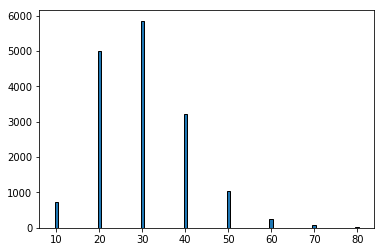

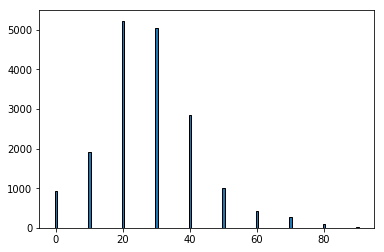

In [73]:
xa = list(di_edadA.keys())
ya = list(di_edadA.values())

xv = list(di_edadV.keys())
yv = list(di_edadV.values())

from matplotlib import pyplot

pyplot.figure()
pyplot.bar(xa, ya, edgecolor = 'black', linewidth=1)
pyplot.show()

pyplot.figure()
pyplot.bar(xv, yv, edgecolor = 'black')
pyplot.show()

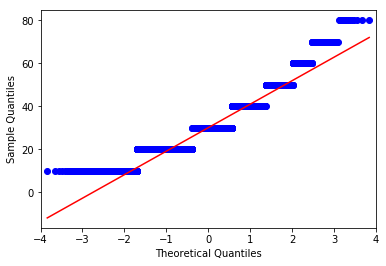

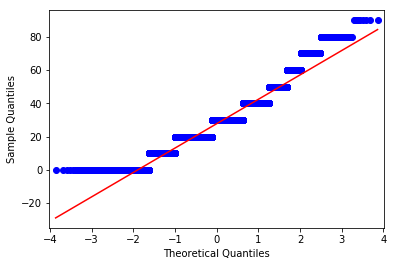

In [74]:
import numpy as np
myarray = np.asarray(edad_a)
qqplot_data = qqplot(myarray, line='s').gca().lines

myarray2 = np.asarray(edad_v)
qqplot_data = qqplot(myarray2, line='s').gca().lines

In [75]:
print("Edad víctimas")
stat, p = shapiro(yv)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('NO normal')
    
print('-------------------')    
print("Edad agresores")
stat, p = shapiro(ya)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Normal')
else:
    print('NO normal')

Edad víctimas
Statistics=0.817, p=0.024
NO normal
-------------------
Edad agresores
Statistics=0.820, p=0.047
NO normal


Se rechaza la hipótesis de normalidad ya que el _p-valor_ en ambos casos es menor que el estadístico de prueba.